<h1><center> Statistiques sous Python (avec Pandas) </center></h1>

## Analyse de Données Massives

Nous allons utiliser dans cet exercice le module pandas permettant l'analyse de données avec Python. La première instruction est d'installer le module, à faire dans un terminale de commande.
<br>

- pip install pandas
- pip install numpy

Une fois le module est installé, nous pouvons lancer un notebook pour commencer notre programme. Il faut tout d'abord importer le module.


In [1]:

# Importatioon du module pandas

import pandas
import numpy



## Données
    
    
Nous allons travailler sur des données collectées par un serveur (data.csv). Il a enregistré des informations sur chaque pourboire qu'il a reçu sur une période de quelques mois en travaillant dans un restaurant. Il a collecté plusieurs variables:

1. facture en dollars,

2. pourboire en dollars,

3. sexe du payeur de factures,

4. s'il y avait des fumeurs dans la fête,

5. jour de la semaine,

6. moment de la journée,

7. taille de la fête.


- Lire ces données dans le <code>Notebook</code> avec <code>read_csv()</code> de <code>pandas</code>.</p>


In [2]:

# Lecture d'un fichier csv avec pandas

tips = pandas.read_csv("serveur.csv",sep = ",")



<p>Sur ces données, il est bien évidemment possible de voir quelques informations classiques.</p>


In [3]:

# Type des données

type(tips)

pandas.core.frame.DataFrame

In [4]:

# Taille

tips.shape

(244, 7)

In [5]:

#nombre d'observation par champs
tips.count()


facture      244
pourboire    244
sex          244
Fumeur       244
Jour         244
temps        244
size         244
dtype: int64

In [6]:

# Afficher l'entête du jeu de données dans une liste

# list(tips.columns)
list(tips)

['facture', 'pourboire', 'sex', 'Fumeur', 'Jour', 'temps', 'size']


## Statistiques descriptives univariés


- Décrire et afficher toutes les variables quantitatives du jeu de données directement (fichier csv).
  ex: nombre d'obseravtions, moyenne, écart-type, min-max, quantile Q1, quantile Q2, quantile Q3

In [7]:
tips.describe()

,facture,pourboire,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


- Arrandire les valeurs (2 chiffres après la virgule)

In [8]:
tips.describe().round(2)

,facture,pourboire,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


- Décrire juste une seule variable quantitative (ex: <code>"facture"</code>).</p>

In [9]:
tips.facture.describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: facture, dtype: float64

- Calculer sa moyenne, écart-type, variance, médiane, min, max, quantiles

In [12]:
# #moyenne
# tips.facture.mean()

# #écart-type
# tips.facture.std()

# #variance
# tips.facture.var()

# #médiane
# tips.facture.median()

# #min
# tips.facture.min()

# #max
# tips.facture.max()

#quantiles
tips.facture.quantile([.01, .1, .9, .99])


0.01     7.250
0.10    10.340
0.90    32.235
0.99    48.227
Name: facture, dtype: float64


## Histogramme

Pour représenter graphiquement les variables d'un jeu de données, <code>pandas</code> met à disposition (via le module <code>matplotlib</code> utilisé par <code>pandas</code>) des fonctions graphiques.

- Réaliser un <strong>histogramme</strong>, en utilisant une version avec la fonction <code>hist()</code>. 

- Une deuxième version avec la fonction <code>plot()</code>.

- Réaliser les deux fonctions précedentes, mais seulement pour une seule variable du jeu de données

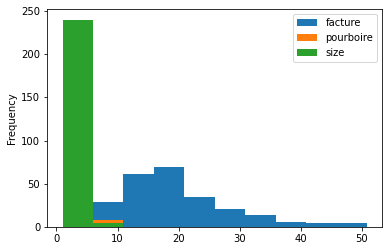

In [49]:
tips.plot.hist()

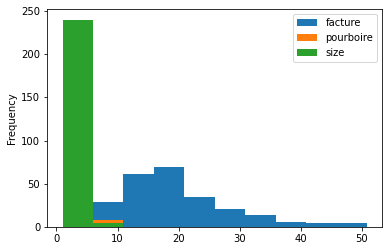

In [50]:
tips.plot(kind = "hist")

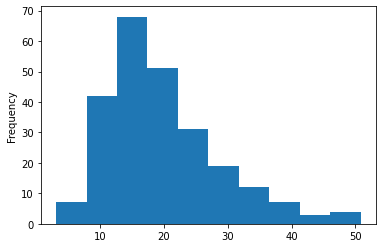

In [51]:
tips.facture.plot(kind = "hist")

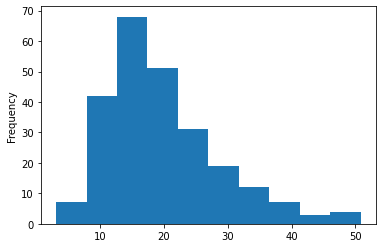

In [52]:
tips.facture.plot(kind = "hist")


## Boîtes à moustaches
    
    
- Afficher les <strong>boîtes à moustaches</strong> du jeu de données.

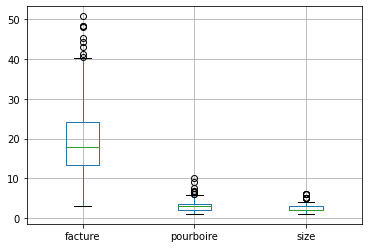

In [53]:
tips.boxplot()

- Afficher <strong>la boîte à moustache</strong> d'une variable spécifique.

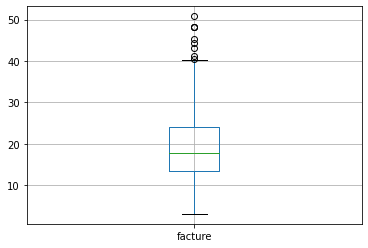

In [54]:
tips.boxplot(column = "facture")


- Afficher <strong>la boîte à moustache</strong> d'une variable spécifique en enlevant la gride.

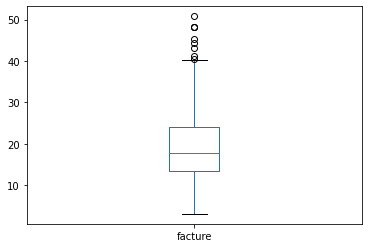

In [55]:
tips.boxplot(column = "facture", grid = False)


## Qualitative
    
- Afficher la table d'occurences (ou des effectifs) des variables qualitatives, ainsi que la table des proportions des modalités.</p>


In [56]:
tips.sex.describe()

count      244
unique       2
top       Male
freq       157
Name: sex, dtype: object

In [57]:
tips.sex.unique()

array(['Female', 'Male'], dtype=object)

- Calculer le nombre d'occurence par modalité de la variable sex par deux versions (value_counts() et crosstab() )

In [18]:

tips.sex.value_counts()

pandas.crosstab(tips.sex, "freq") # Calculez une simple tabulation croisée de deux (ou plus) variables. 
                                   # Par défaut, calcule une table de fréquences des variables sauf si un 
                                   # tableau de valeurs et une fonction d'agrégation sont passés.

col_0,freq
sex,
Female,87
Male,157


- Calculer le nombre d'occurence normalisé par modalité de la variable sex par deux versions

In [8]:

pandas.crosstab(tips.sex, "freq", normalize=True)

col_0,freq
sex,
Female,0.356557
Male,0.643443



### Diagramme en barres 
    
- Réaliser un <strong>diagramme en barres</strong>, en utilisant le type <code>"bar"</code> pour <code>plot()</code>. 


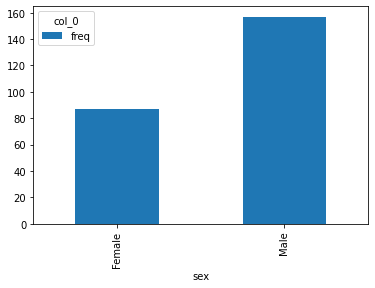

In [60]:
t = pandas.crosstab(tips.sex, "freq")
t.plot.bar()


### Diagramme circulaire

- Réaliser un <strong>diagramme circulaire</strong>, pour le tableau des effectifs de la variable sex produit par <code>crosstab()</code>.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021FCFFC17C8>],
      dtype=object)

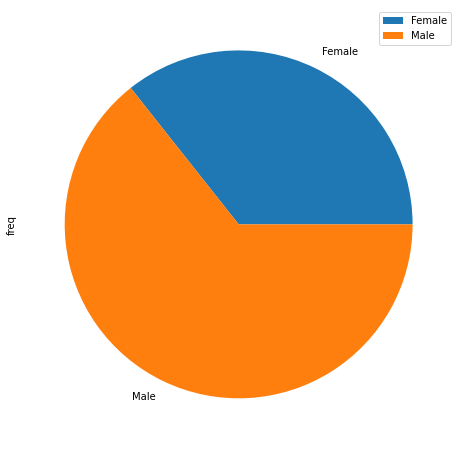

In [19]:
t = pandas.crosstab(tips.sex, "freq")
t.plot.pie(subplots=True, figsize = (8,8))

## Statistiques descriptives bivariées

### Quantitative

- Calculer la correlation entre les différentes variables du jeu de données.

In [20]:
tips.corr()
# tips.cov()

,facture,pourboire,size
facture,1.000000,0.675734,0.598315
pourboire,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


- Calculer la correlation entre deux variables du jeu de données.

In [63]:
tips.facture.corr(tips.pourboire)

0.6757341092113641

- Calculer la covarriance entre deux variables du jeu de données.

In [64]:
tips.facture.cov(tips.pourboire)

8.323501629224854


### Nuage de points

- Afficher le nuage des points des deux variables X=facture et Y=pourboire

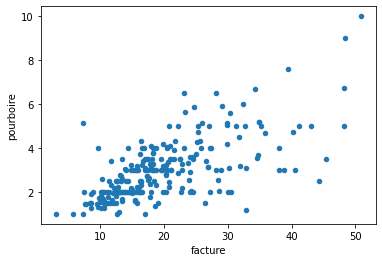

In [65]:
tips.plot.scatter("facture", "pourboire")


### Qualitative


In [66]:

# Afficher la table croisée du nombre des fumeurs et non fumeurs selon leur sex dans le jeux de données

pandas.crosstab(tips.sex, tips.Fumeur)


Fumeur,No,Yes
sex,,
Female,54,33
Male,97,60


In [67]:

# Afficher la table croisée du nombre des fumeurs et non fumeurs selon leur sex avec le nombre total de chaque ligne/colonne dans le jeux de données
pandas.crosstab(tips.sex, tips.Fumeur, margins=True)


Fumeur,No,Yes,All
sex,,,
Female,54,33,87
Male,97,60,157
All,151,93,244


In [68]:

# Afficher la table croisée normalisée du nombre des fumeurs et non fumeurs selon leur sex dans le jeux de données

pandas.crosstab(tips.sex, tips.Fumeur, normalize = True)


Fumeur,No,Yes
sex,,
Female,0.221311,0.135246
Male,0.397541,0.245902


In [76]:

# Afficher la moyenne des factures, pourboires, size groupée par sex

tips.groupby("sex").mean()


,facture,pourboire,size
sex,,,
Female,18.056897,2.833448,2.459770
Male,20.744076,3.089618,2.630573


In [71]:


# Afficher la moyenne, l'écart-type, médiane, min et max de la variable facture groupés par sex

tips.groupby("sex")["facture"].agg([numpy.mean, numpy.std, numpy.median, numpy.min, numpy.max])


,mean,std,median,amin,amax
sex,,,,,
Female,18.056897,8.009209,16.40,3.07,44.30
Male,20.744076,9.246469,18.35,7.25,50.81


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000227AD3CF4C8>,
      dtype=object)

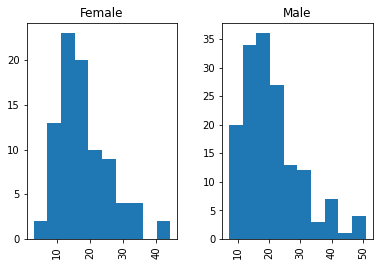

In [72]:

# Afficher les deux histogrammes de la variable facture selon le sex

tips.hist(column = "facture", by = "sex")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000227AD4A3DC8>,
      dtype=object)

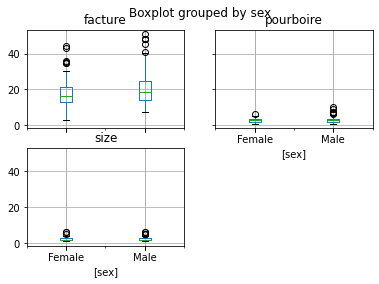

In [73]:

# Afficher les boites à moustache de toutes les variables (facture, pourboire, size) selon le sex

tips.boxplot(by = "sex")


### Diagramme en barres


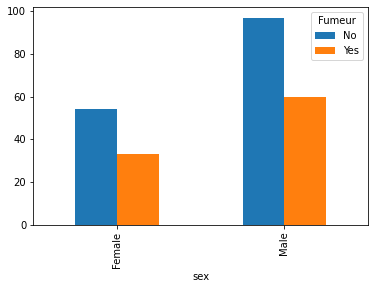

In [74]:

# Afficher le diagramme en barres du nombre des fumeurs et non fumeurs selon leur sex

t = pandas.crosstab(tips.sex, tips.Fumeur)
t.plot.bar()


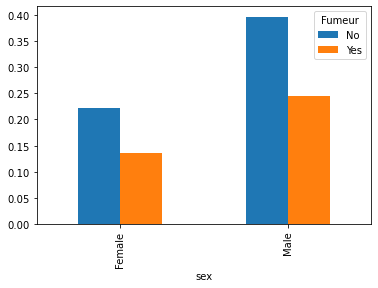

In [78]:

# Afficher le diagramme en barres du nombre des fumeurs et non fumeurs selon leur sex normalisé

t = pandas.crosstab(tips.sex, tips.Fumeur, normalize=True)
t.plot.bar()